In [1]:
import pandas as pd
import numpy as np
posts = pd.read_csv('posts_count.csv.gz', compression='gzip', error_bad_lines=False)

/usr/local/lib/python3.5/dist-packages/IPython/core/interactiveshell.py:2717: DtypeWarning: Columns (1) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


### Basic Filter

In [2]:
posts = posts[posts['titleCount'] > 2]
posts = posts[posts['contentCount'] > 10]
posts = posts[posts['contentCount'] < 1000]
posts = posts[posts['wpsCount'] > 3]
posts = posts[posts['wpsCount'] < 30]

### Counting

In [3]:
blogs = posts[['posts.csv']].groupby(['posts.csv'])
autores = posts[['authorID']].groupby(['authorID'])
print('Postagens: %i' %len(posts))
print('Blogs: %i' %len(blogs))
print('Autores: %i' %len(autores))

Postagens: 568144
Blogs: 120371
Autores: 125474


### LIWC

In [8]:
from liwc import LIWC
liwc_class = LIWC()

In [10]:
def buildMe(x): 
    try:
        texts = []
        texts.append(x['content'])
        mtx = liwc_class.build_features(texts)
        return mtx[0][3]
    except:
        return 0

posts['me'] = posts.apply(buildMe,axis=1)

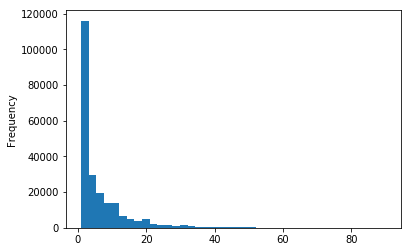

In [11]:
%matplotlib inline
iamHist = posts['me']
iamHist = iamHist[iamHist > 0]
iamHist = iamHist[iamHist < 100]
iamHist.plot.hist(bins=40)

In [12]:
#posts.to_csv('posts_count_me.csv.gz', compression='gzip')